Step 1 : Loading the Dataset

We use Scikit-learn's load_iris() function to fetch the dataset.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()
data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
data['target'] = iris['target']

Step 2 : Preprocessing the Data

We divide the dataset into 80% training and 20% testing data using train_test_split() function.

In [2]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['target'])  # Features
y = data['target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardizing the Features

Feature scaling is important in Machine Learning, especially for algorithms like SVM that rely on distances between points.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 3 : Train the SVM Model

SVM is a powerful ML algorithm used for classification. We use the linear kernel to classify the vectors accordingly.

In [4]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

Step 4 : Model Evaluation

Once the model is trained, we test it on the test data  and determine it's performance using the following metrics:

1. Accuracy Score

2. Confusion Matrix

3. Classification Report

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.97
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Step 5 : Visualizing the Results

We visualize the confusion matrix to understand how well the model classified each species.

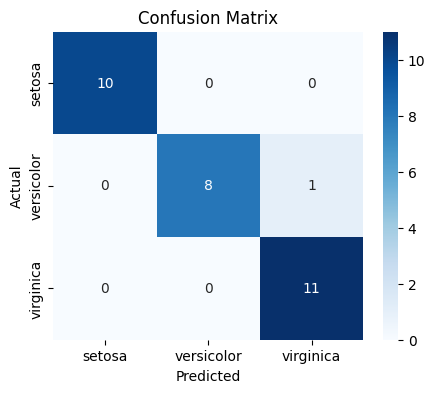

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()